In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv("/content/Housing.csv")
print(" First 5 rows of the dataset:\n")
print(df.head())

 First 5 rows of the dataset:

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [19]:
df.replace({
    'yes': 1, 'no': 0,
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
}, inplace=True)

In [20]:
df = df.infer_objects()

In [21]:
X = df.drop('price', axis=1)
y = df['price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


 Evaluation Metrics:
MAE (Mean Absolute Error): 979679.69
MSE (Mean Squared Error): 1771751116594.04
R² Score: 0.65


In [27]:
print("\n Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


 Model Coefficients:
area: 235.85
bedrooms: 78574.49
bathrooms: 1097117.27
stories: 406223.16
mainroad: 366824.19
guestroom: 233146.77
basement: 393159.78
hotwaterheating: 687881.31
airconditioning: 785550.58
parking: 225756.51
prefarea: 629901.66
furnishingstatus: 210397.12
Intercept: -127711.17


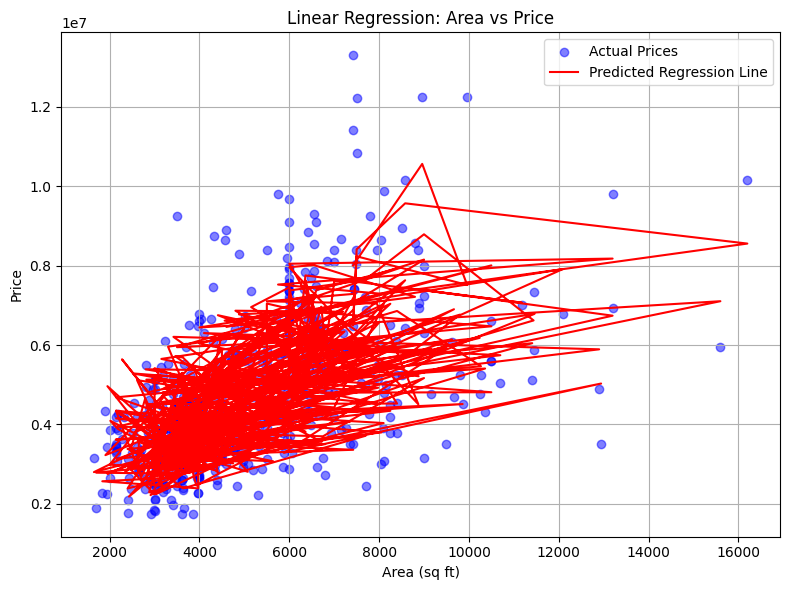

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(df['area'], df['price'], color='blue', alpha=0.5, label='Actual Prices')
plt.plot(df['area'], model.predict(X), color='red', label='Predicted Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()